<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> CANSER DATASET</b></div>

    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> 🎯 Project Description:</font></h3>   
    
    
- In this project, we will perform basic Exploratory Data Analysis (EDA) on the **Cancer.csv**. 
- EDA will help us to understand this dataset in detail using basic Python code.
    
- In the dataset each sample belongs to a patient and includes various biopsy measurements.
- These measurements provide information about the characteristics of the tumor cells. 
- **Aim:** By examining the features of **benign**(iyi huylu) and **malignant**(kotu huylu) cells, we will try to determine the structural similarities and differences between these tumor cells.

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> ✨ Getting to Know About Cancer</font></h3>  


- Cancer is a disease characterized by the **uncontrolled growth and spread of abnormal cells** in the body (metastasize).
- Cancer can be caused by **genetic mutations that can be inherited or acquired due to environmental factors**.
- However, it is curable if detected in an early-stage as a non-metastatic disease thus underlying the importance of early detection and need to conduct research in these lines.
- Treatment options for cancer typically include surgery, chemotherapy, radiation therapy, immunotherapy, or targeted therapy, depending on the type and stage of the cancer.
    

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
<p style="text-align: center;"><font color='dodgerblue'> <b> Normal Cells & Cancer Cells </b><font color='black'><p>     
    
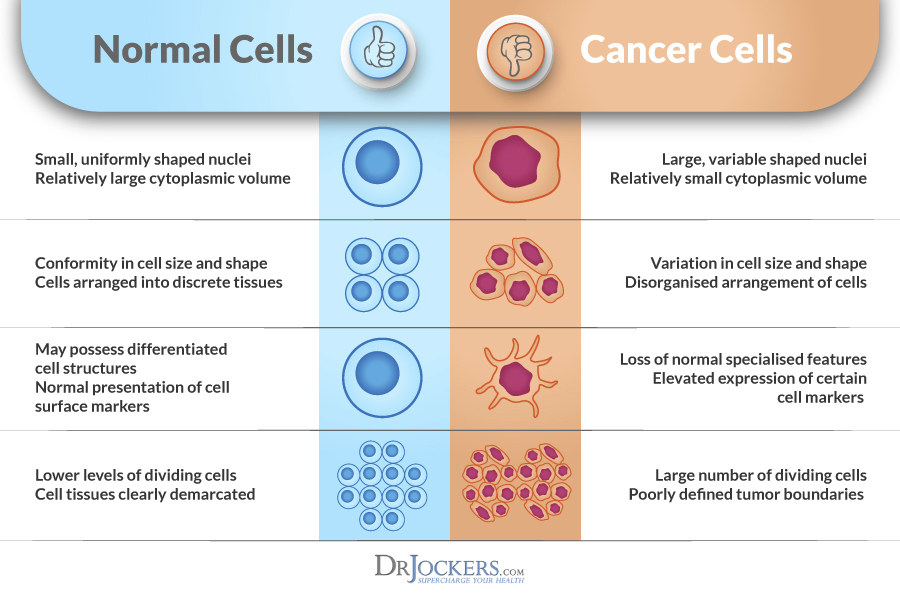
[Reference: The Difference Between Normal and Cancer Cells](https://drjockers.com/cancer-cells/)
    

In [3]:
import numpy as np
import plotly.graph_objects as go
df0 = pd.read_csv('cancer.csv')
df = df0.copy()

# Function to create a detailed cancer cell with an irregular surface
def create_detailed_cancer_cell(radius=1.0, deform_factor=0.2, detail_level=100):
    phi, theta = np.mgrid[0.0:np.pi:complex(detail_level), 0.0:2.0*np.pi:complex(detail_level)]
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    # Adding more irregularities to the surface
    x += deform_factor * np.sin(phi * 3) * np.cos(theta * 3)
    y += deform_factor * np.sin(theta * 3) * np.sin(phi * 3)
    z += deform_factor * np.cos(phi * 3) * np.sin(theta * 3)
    return x, y, z

# Function to create an irregular nucleus
def create_irregular_nucleus(center=[0, 0, 0], radius=0.3, deform_factor=0.1, detail_level=50):
    phi, theta = np.mgrid[0.0:np.pi:complex(detail_level), 0.0:2.0*np.pi:complex(detail_level)]
    x = radius * np.sin(phi) * np.cos(theta) + center[0]
    y = radius * np.sin(phi) * np.sin(theta) + center[1]
    z = radius * np.cos(phi) + center[2]
    # Adding more irregularities to the nucleus
    x += deform_factor * np.sin(phi * 5) * np.cos(theta * 5)
    y += deform_factor * np.sin(theta * 5) * np.sin(phi * 5)
    z += deform_factor * np.cos(phi * 5) * np.sin(theta * 5)
    return x, y, z

# Create detailed cancer cell
x_cancer, y_cancer, z_cancer = create_detailed_cancer_cell()

# Create irregular nucleus
x_nucleus, y_nucleus, z_nucleus = create_irregular_nucleus()

# Create the plot
fig = go.Figure()

# Add the cancer cell surface
fig.add_trace(go.Surface(x=x_cancer, y=y_cancer, z=z_cancer, colorscale='Reds', opacity=0.8, name='Cancer Cell'))

# Add the irregular nucleus surface
fig.add_trace(go.Surface(x=x_nucleus, y=y_nucleus, z=z_nucleus, colorscale='Blues', opacity=0.6, name='Nucleus'))

# Update the layout for better visualization
fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[-1.5, 1.5]),
    yaxis=dict(nticks=10, range=[-1.5, 1.5]),
    zaxis=dict(nticks=10, range=[-1.5, 1.5]),
    aspectratio=dict(x=1, y=1, z=1)
))

# Set plot title
fig.update_layout(title='3D Visualization of a Detailed Cancer Cell with Irregular Nucleus', scene_aspectmode='cube')

# Show the plot
fig.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
   
<h3 align="left"><font color=dodgerblue> 📝 About the Dataset </font></h3>
  
    
**Structural Analysis**
- **Dataset**: Cancer.csv
- **Number of Rows**: 569
- **Number of Columns**: 31   
        
**INPUTS:** 

*Columns between [0-9] represent the **mean** in the measurements of various tumor characteristics.*


*Columns between [10-19] represent the **error rates** (std) in the measurements of various tumor characteristics.*
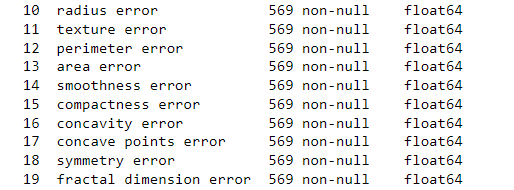


*Columns between [20-29] represent the **mean of the 3 worst (largest) values** in the measurements of various tumor characteristics.*

**
*The column [30] represents:* **target**: Type of tumor cell (**1: benign, 0: malignant**).
 
---    
    
**KEY FEATURES:**

1. **Radius (yarıçap)**: distance from the center to the perimeter.
    
- *A larger radius indicates a larger tumor, while a smaller radius indicates a smaller tumor.* 
- *This measurement can be important in determining the stage and potential malignancy of the tumor, as larger tumors are often more advanced and potentially more dangerous.*
   
2. **Texture (dokusu)**: standard deviation of gray-scale values (i.e., the pixel intensity). These values are used to quantify the texture.
    
- *Higher Texture Value: Indicates greater variability in grey-scale intensity, suggesting more heterogeneity and potentially irregular cell structures, which can be associated with malignancy.*
- *Lower Texture Value: Indicates less variability in grey-scale intensity, suggesting smoother and more homogeneous cell surfaces, which is more typical of benign cells.

3. **Perimeter (cevre)**:
- *Larger Perimeter: Indicates a larger and potentially more irregular tumor boundary, which may suggest malignancy.(potentially more aggressive)*
- *Smaller Perimeter: Indicates a smaller and potentially more regular tumor boundary, which may suggest benignity.*

4. **Area (alan)**: The area can provide important insights into the tumor's growth and stage.
- *Larger Area: Indicates a larger tumor, which may be more advanced or aggressive.*
- *Smaller Area: Indicates a smaller tumor, which may be less advanced. *

5. **Smoothness (pürüzsüzlük)**: local variation in radius lengths.
- *Higher Smoothness Value: Indicates a more irregular and jagged tumor boundary, suggesting malignancy.*
- *Lower Smoothness Value: Indicates a smoother and more regular tumor boundary, suggesting benignity. *

6. **Compactness (hucreler arasi yakinlik)**: (perimeter² / area — 1.0)
- *Higher Compactness Value: Indicates a more irregular and less compact shape, suggesting malignancy.*
- *Lower Compactness Value: Indicates a more regular and compact shape, suggesting benignity.*

7. **Concavity (çıkıntı)**: severity of concave portions of the contour.
- *Higher Concavity Value: Indicates more pronounced and numerous inward curvatures in the tumor boundary, suggesting malignancy.*
- *Lower Concavity Value: Indicates a smoother and more convex boundary, suggesting benignity.*

8. **Concave Points (çıkıntı sayısı)**: number of concave portions of the contour.
- *Higher Number of Concave Points: Indicates a more irregular and complex tumor boundary with more inward curvatures, suggesting malignancy.*
- *Lower Number of Concave Points: Indicates a smoother and more regular tumor boundary with fewer inward curvatures, suggesting benignity.*

9. **Symmetry (simetri)**:  
- *Higher symmetry values suggest that the cells are more regular and uniform in shape, which is more typical of benign cells.*
- *Lower symmetry values indicate more irregular, asymmetrical shapes, which can be associated with malignancy.*

10. **Fractal Dimension (dış yüzey yapısı)**: tumor's boundary.
- *Malignant tumors often have more **irregular and complex** boundaries compared to benign.*
    
11) **Target**: Type of tumor cell (1: benign, 0: malignant).
    
---
    
**Connections Between the Fields**
    
- **Mean Features**: These features represent the mean values of certain attributes (e.g., radius or area) for each tumor.
- **Error Features**: These features represent the error rates in the measurements, representing the variability of a particular attribute.
- **Worst Features**: These features represent the **mean of the 3 worst (largest) measurement of values** and are used to determine the **most aggressive size** or **shape of the tumor**.

---        
    

[Medium: Cancer Diagnostic Dataset](https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd)    

## <font color=#2865c8> <b> Explorotory Data Analysis (EDA) </b><font color='orange'>

### <font color='dodgerblue'> <b> Import The Libraries</b><font color='orange'>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Import the “kyphosis.csv" file using Pandas
df0 = pd.read_csv('cancer.csv')
df = df0.copy()

In [6]:
df.shape

(569, 31)

### <font color='dodgerblue'> <b> Head and Tail </b><font color='orange'>

In [7]:
#Show the first couple of rows using .head()
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

In [6]:
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
564                 0.05623        1.1760          1.256            7.673   
565                 0.05533        0.7655          2.463            5.203   
566                 0.05648        0.4564          1.075            3.425   
567                 0.07016        0.7260          1.595            5.772   
568                 0.05884        0.3857          1.428            2.548   

     area error  smoothness error  compactness error  concavity error  \
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
564               0.02454         0.01114                 0.004239   
565               0.01678         0.01898                 0.002498   
566               0.01557         0.01318                 0.003892   
567               0.01664         0.02324                 0.006185   
568               0.00000         0.02676                 0.002783   

     worst radius  worst texture  worst perimeter  worst area  \
564        25.450          26.40           166.10      2027.0   
565        23.690          38.25           155.00      1731.0   
566        18.980          34.12           126.70      1124.0   
567        25.740          39.42           184.60      1821.0   
568         9.456          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1

### <font color='dodgerblue'> <b> Info</b><font color='orange'>

In [7]:
# Obtain a Statistical Summary about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### <font color='dodgerblue'> <b> Perform Basic Statistical Data Analysis </b><font color='orange'>

In [8]:
df.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

### <font color='dodgerblue'> <b> Check out the dublicated values </b><font color='orange'>

In [9]:
#Check the duplicated data if exists
df.duplicated().sum()

0

### <font color='dodgerblue'> <b> Check out the missing values </b><font color='orange'>

In [10]:
df.isnull().sum().sum()

0


##  <font color=#2865c8> <b> Distributions </b><font color='black'> 


### <font color='dodgerblue'> <b> What is the distribution of the `target` variable (malignant vs. benign)?  </b><font color='orange'>

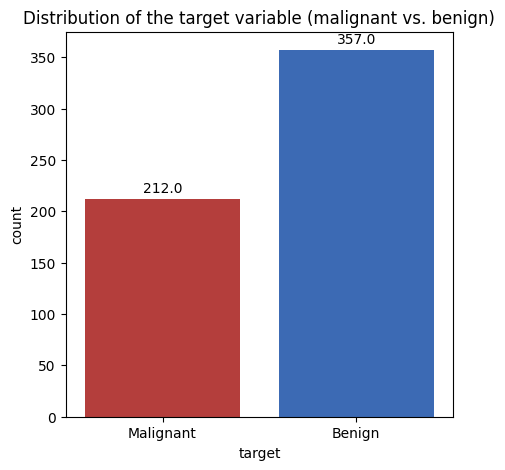

In [40]:
# Plotting the countplot
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x='target', palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of the target variable (malignant vs. benign)')

# Calculate counts and add them as labels on the bars
counts = df['target'].value_counts()

# Set x-axis labels to "Malignant" and "Benign"
ax.set_xticklabels(['Malignant','Benign'])

# Adding counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', 
                va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

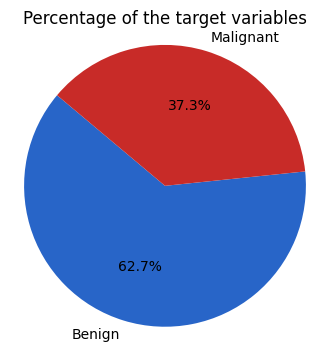

In [41]:
# Let's print out countplot to know how many samples belong to class #0 and #1

# Calculate counts
counts = df['target'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=140, colors=['#2865c8', '#c82b28'])
plt.title('Percentage of the target variables')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: CountPlot; Count of Samples for Each Class</font>  
 
- The dataset(569) consists of (62.7%) 357 benign samples; and (37.3%) 212 malignant samples.
- There are significantly more benign cases compared to malignant cases.

### <font color='dodgerblue'> <b>What are the distributions of the key features (size-shape-texture features)? </b><font color='orange'>

#### <font color='dodgerblue'> <b>Distributions of  `Mean Radius` by Target: </b><font color='orange'>

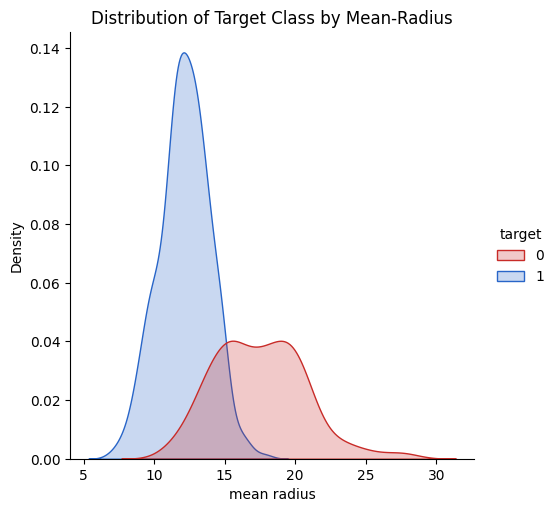

In [29]:
sns.displot(df, x='mean radius', hue='target', kind='kde', fill=True ,palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of Target Class by Mean-Radius')

plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Displot; Distribution of Target Class by Mean Radius</font>  

- Benign tumors (blue) have a `mean radius` distribution concentrated around 10-12, with a peak density around 12.
- Malignant tumors (red) have a `mean radius` distribution spread out more broadly, with values ranging from around 12 to over 25.
- There is a significant overlap between the two distributions in the range of 12 to 17.
    - *While `mean radius` can be a useful feature in distinguishing between benign and malignant tumors, there is still overlap that might require additional features for a more accurate classification.*

#### <font color='dodgerblue'> <b>Distributions of `Mean texture` by Target: </b><font color='orange'>

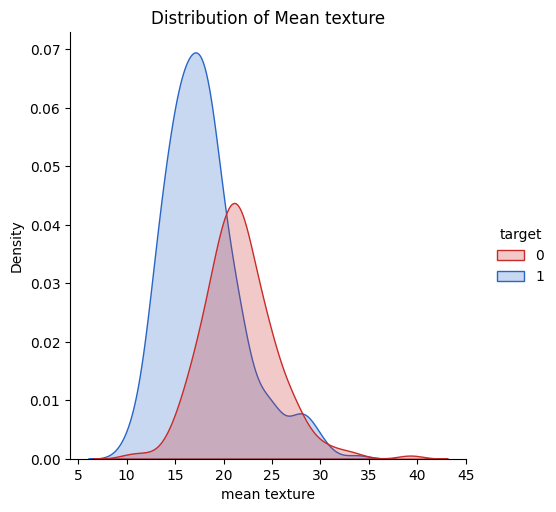

In [35]:
sns.displot(df, x='mean texture', hue='target', kind='kde', fill=True,palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of Mean texture')
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Displot; Distribution of Mean Texture</font>  

- The distribution of `mean texture` shows that benign tumors (blue) predominantly have values between `15 and 22`. 
- Malignant tumors (red), generally have `higher mean texture values`, mostly ranging between `20 and 30`. 
- *However, there is an `overlap` in the range of 20 to 25, where both classes share similar values, which might require additional features to fully differentiate between them.*

#### <font color='dodgerblue'> <b>Distributions of `Mean Concavity` by Target: </b><font color='orange'>

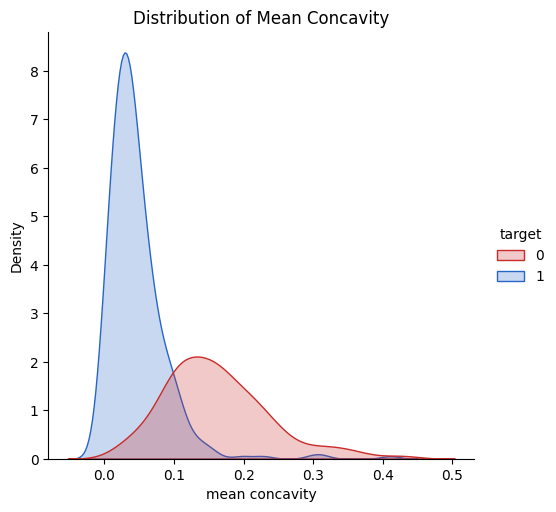

In [27]:
sns.displot(df, x='mean concavity', hue='target', kind='kde', fill=True,palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of Mean Concavity')
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Displot; Distribution of Mean Concavity</font>  

- Benign tumors (blue) predominantly have **low mean concavity values**, whereas malignant tumors (red) display a wider range and generally higher mean concavity values. 
- This indicates that mean concavity is a distinguishing feature between benign and malignant tumors, with higher concavity values being more associated with malignancy.

#### <font color='dodgerblue'> <b>Distributions of `Error Area` by Target: </b><font color='orange'>

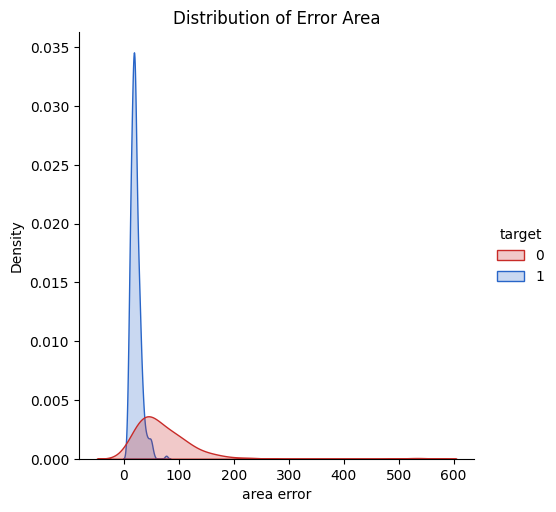

In [39]:
sns.displot(df, x='area error', hue='target', kind='kde', fill=True,palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of Error Area')
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Distribution of error area</font>  

- The distribution of `error area` shows that benign tumors (blue),**have very low error area values**, mostly concentrated near zero. 
- Malignant tumors (red) have a **wider range of error area values** extending beyond 100. 
This indicates that **error area is generally higher in malignant tumors compared to benign** ones. 
- *However, there is an overlap in the range of 0 to 100, where both classes share similar values, suggesting that additional features might be needed to fully distinguish between them in this range.*

#### <font color='dodgerblue'> <b>Distributions of `Worst Area` by Target: </b><font color='orange'>

In [37]:
sns.displot(df, x='worst area', hue='target', kind='kde', fill=True,palette={1: '#2865c8', 0: '#c82b28'})
plt.title('Distribution of Worst Area')
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Distributions of Worst Area</font>  

- **Target 0 (Malignant):**
  - `worst area` values show a wide range, typically between 500 and 2500 square millimeters, with several outliers extending beyond 4000 square millimeters.
  
- **Target 1 (Benign):**
  - `worst area` values are more concentrated, typically ranging between 500 and 1000 square millimeters, with fewer outliers.

*Malignant cases (target0) tend to have larger and `worst area` values compared to bening cases (target1). 
**This suggests that higher `worst area` values are more likely to be associated with Malignant outcomes**.*

##  <font color=#2865c8> <b> Correlations </b><font color='black'> 

### <font color='dodgerblue'> <b> How do the features correlate with each other?ations </b><font color='orange'>

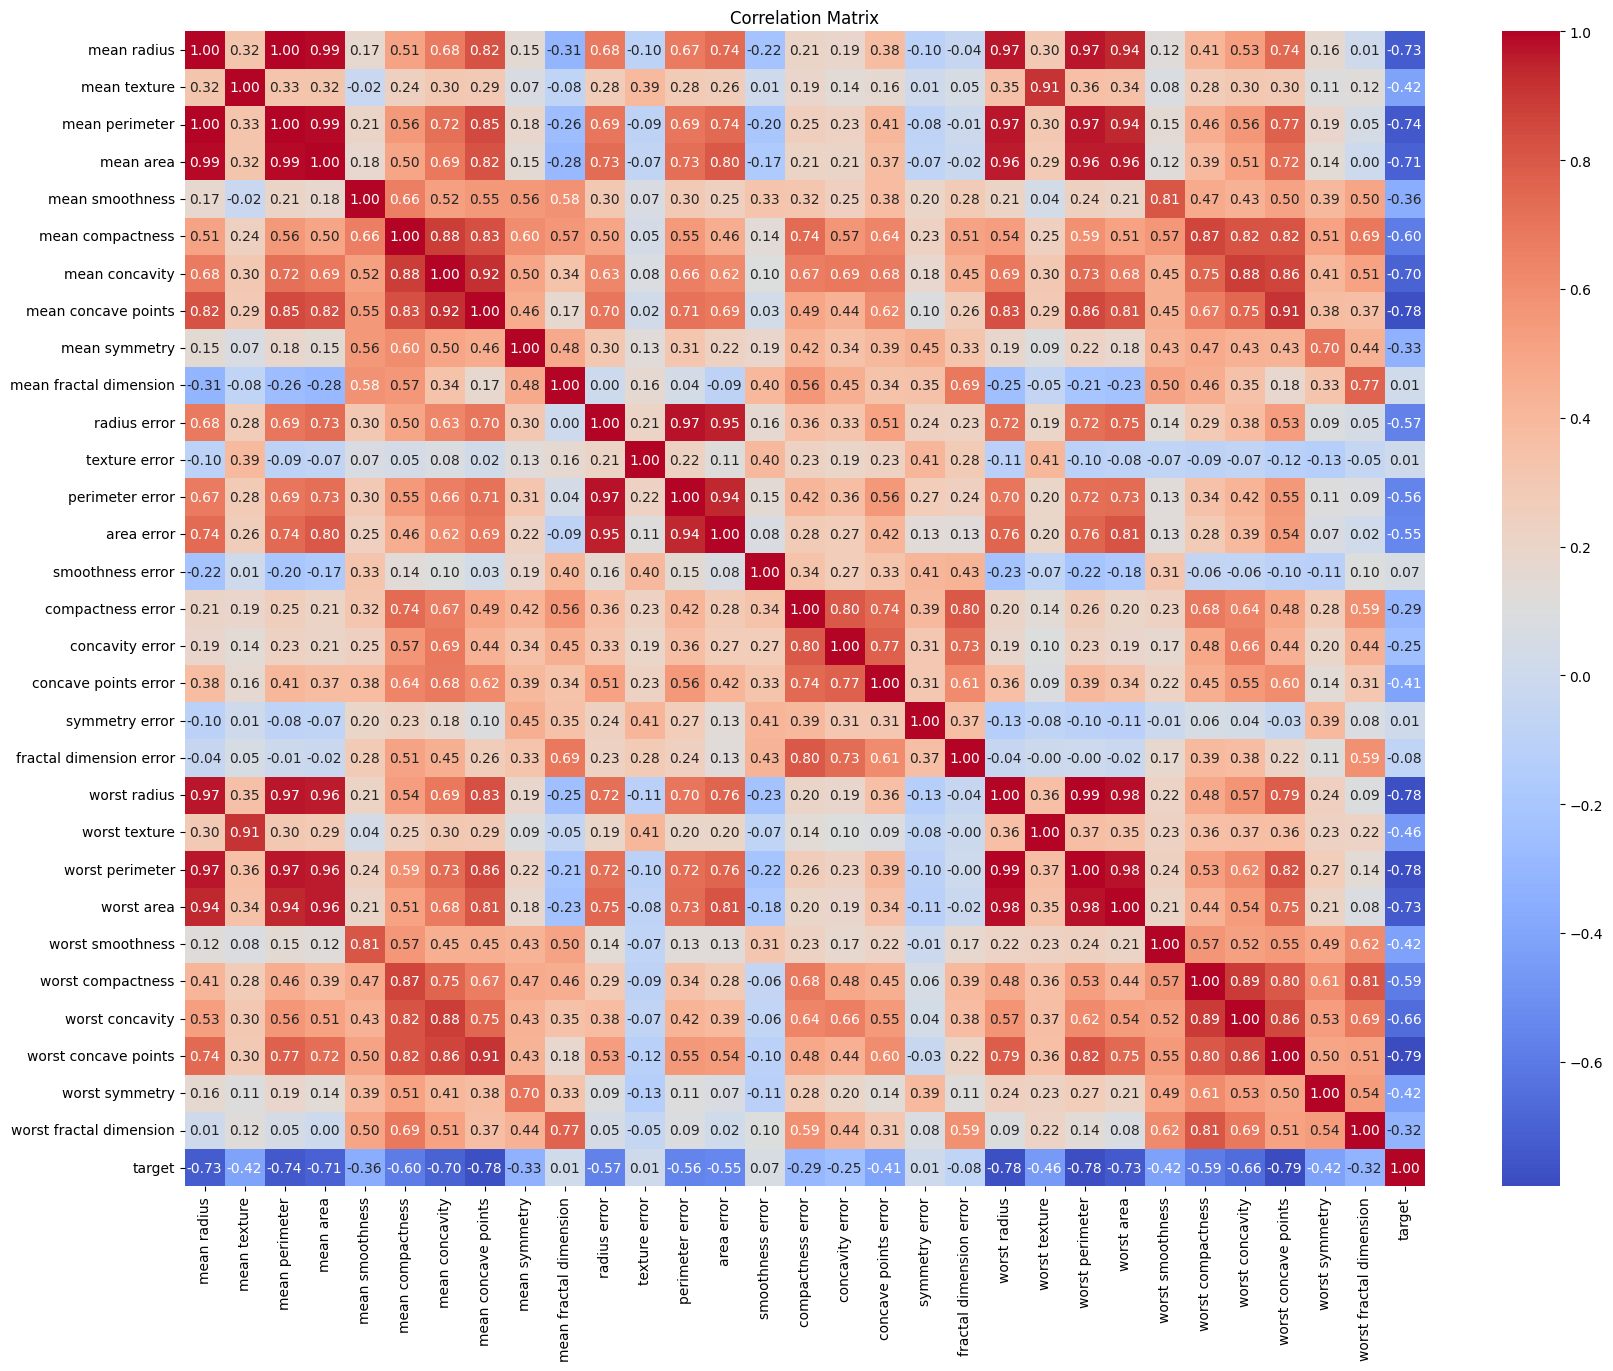

In [29]:
# Correlation Matrix

plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output:Correlation Matrix</font>  

1. **Strong Positive Correlations:** 
  - Features like `mean radius`, `mean area`, `mean concavity` and `mean perimeter` are highly correlated with each other (around 0.99).

2. **Strong Negative Correlations with Target:**
  - Malignant tumors generally have higher values in `radius`, `texture`, and `area`, 
    - but lower values in `compactness`, `smoothness`, and `symmetry`.

These insights highlight key features related to cancer presence and their interrelationships.

### <font color='dodgerblue'> <b>What are the relationship between `size-related features` (radius, area, perimeter)?</b><font color='orange'>

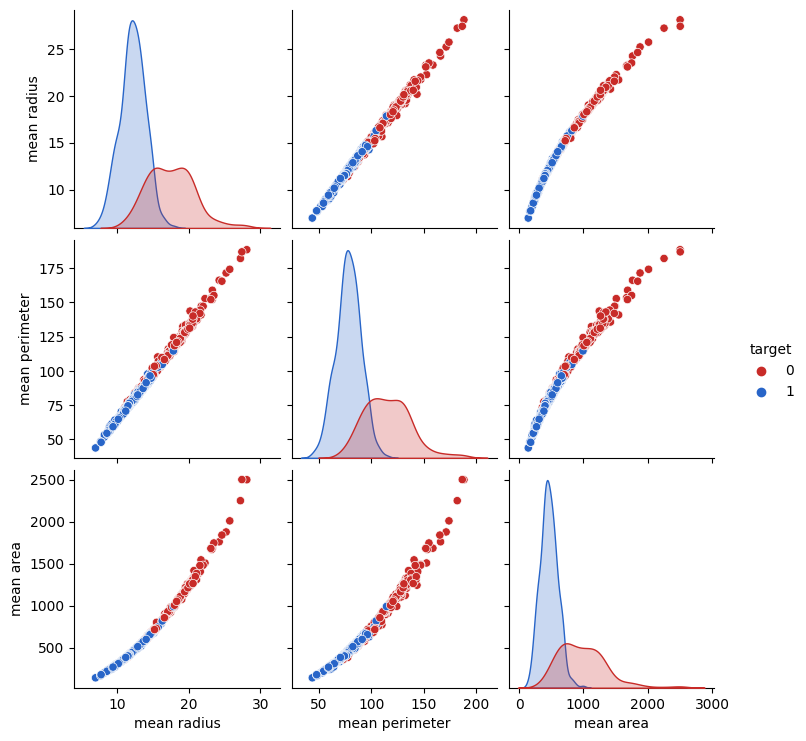

In [7]:
# Strong correlation between the mean_radius and mean_perimeter, mean_area.

sns.pairplot(
    df,
    vars=['mean radius', 'mean perimeter', 'mean area'],
    hue='target',
    palette={
        1: '#2865c8',
        0: '#c82b28'
    })

plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: correlations between size-related features (area, perimeter, radius)</font>  

- **Mean Radius, Mean Perimeter, Mean Area:**
   - The strong positive correlations between these features increase together, which is expected as they all relate to the size of the tumor.
  - Malignant cases (red) generally have higher values for these features compared to benign cases (blue).

**Overall Insight:**
 - **Malignant Cases (Target 0):**
  - Tend to have larger values for `mean radius`, `mean perimeter`, and `mean area`.
- **Benign Cases (Target 1):**   
  - Tend to have smaller and more consistent values for these features.  

### <font color='dodgerblue'> <b>What are the relationship between `shape-related features` (texture, smoothness, concavity)?</b><font color='orange'>

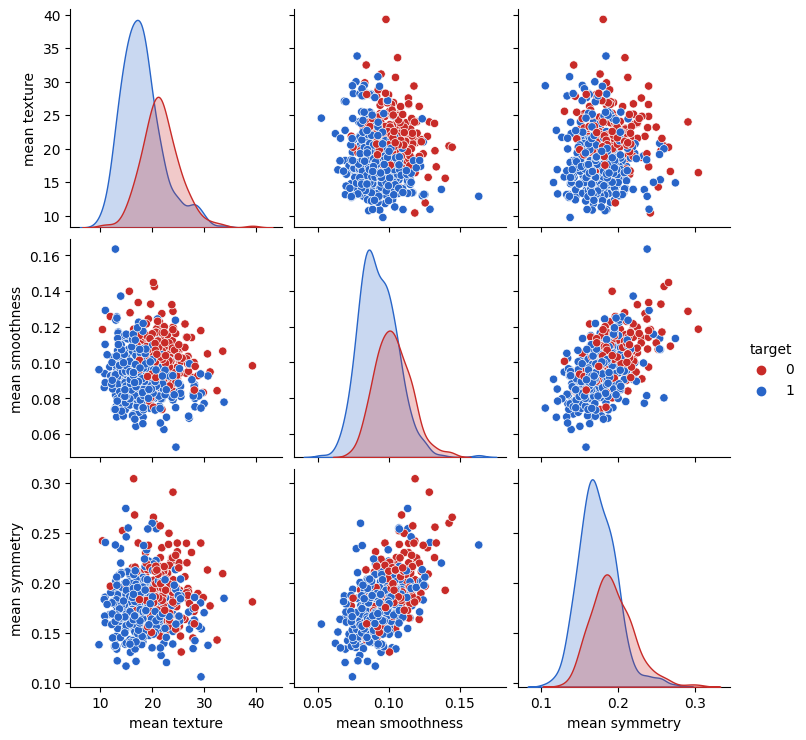

In [43]:
sns.pairplot(
    df,
    vars=['mean texture', 'mean smoothness', 'mean symmetry'],
    hue='target',
    palette={
        1: '#2865c8',
        0: '#c82b28'
    })

plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: correlations between shape-related features (texture, smoothness, concavity)</font>  

- **Mean Texture**: Benign tumors (blue) are concentrated between 15-25, while malignant tumors (red) are more spread out and higher.
- **Mean Smoothness**: Both classes overlap significantly, with benign tumors denser at lower values.
- **Mean Symmetry**: Both classes overlap, but malignant tumors tend to have slightly higher values.
    - Overall, **there's significant overlap between classes in all features, indicating the need for multiple features for effective classification.**

### <font color='dodgerblue'> <b>Which features are most correlated in diagnosing malignancy?</b><font color='orange'>

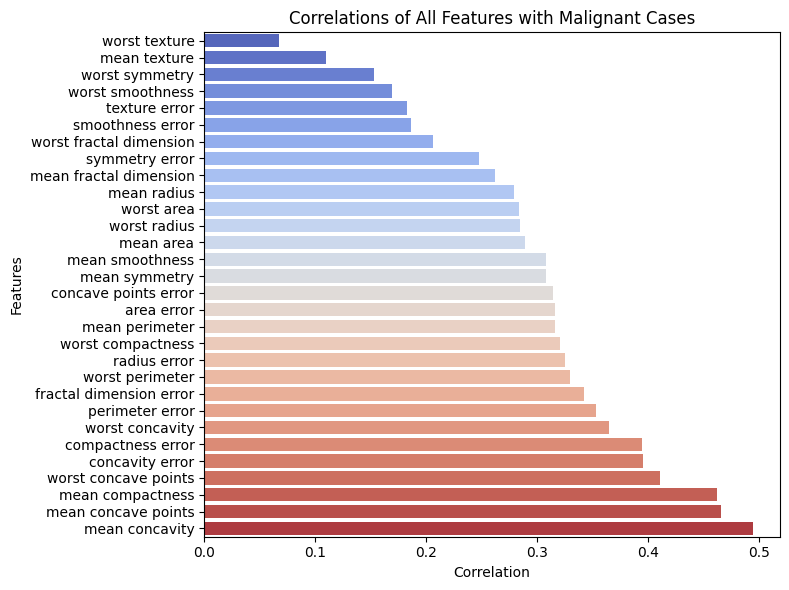

In [15]:
# Filter the data for target = 0 (malignant)
df_malignant = df[df['target'] == 0]

# Drop the 'target' column
df_malignant = df_malignant.drop(columns=['target'])

# Calculating the correlation matrix for malignant cases
correlation_matrix_malignant = df_malignant.corr()

# Sorting the correlations with the mean correlation of all features
correlations_malignant_sorted = correlation_matrix_malignant.mean().sort_values()

# Plotting for malignant cases
plt.figure(figsize=(8,6))
sns.barplot(y=correlations_malignant_sorted.index, x=correlations_malignant_sorted.values, palette="coolwarm", orient='h')
plt.title("Correlations of All Features with Malignant Cases")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##  <font color=#2865c8> <b> Overall Conclusion </b><font color='black'> 

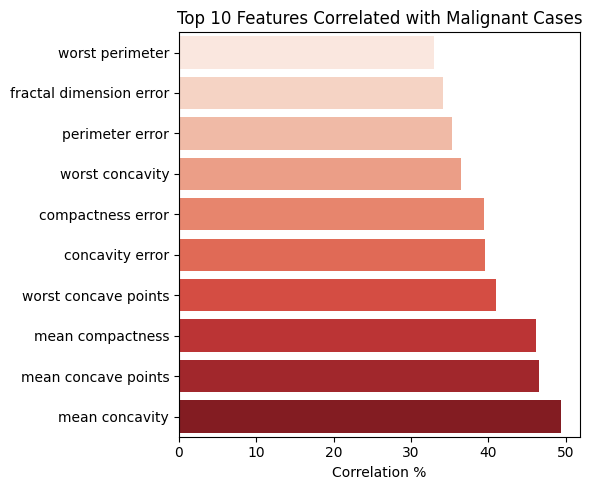

In [45]:
# Filter the data for target = 0 (malignant)
df_malignant = df[df['target'] == 0]

# Drop the 'target' column
df_malignant = df_malignant.drop(columns=['target'])

# Calculating the correlation matrix for malignant cases
correlation_matrix_malignant = df_malignant.corr()

# Sorting the correlations with the mean correlation of all features
correlations_malignant_sorted = correlation_matrix_malignant.mean().sort_values()

# Top 10 features based on correlation with 0: Malignant cases
top_10_features = correlations_malignant_sorted.tail(10)

# Converting correlations to percentages
top_10_features_percentage = top_10_features * 100

# Plotting bar chart with gradient colors based on percentage values
plt.figure(figsize=(6,5))
sns.barplot(y=top_10_features_percentage.index, x=top_10_features_percentage.values, palette="Reds")
plt.title("Top 10 Features Correlated with Malignant Cases")
plt.xlabel("Correlation %")
plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Correlation of all features with the target variables (malignant vs benign)</font>  

1. **Most Correlated Fields:** 
- Features such as **concavity**,**compactness**, **perimeter**, and **dimensions** variables highly positive correlations, and critical for differentiating malignant tumors. 
    - While these features values increase, the likelihood of a tumor being malignant also increases.
    
- **Mean Radius, Mean Perimeter, Mean Area:** The strong positive correlations between these features increase together, which is expected as they all relate to the size of the tumor.
    - Malignant cases (red) generally have higher values size-related features compared to benign cases (blue).
    
2. **Overall:** 
- The **geometric properties and size-related features** of the tumor are more strongly associated with malignancy, highlighting their importance in distinguishing malignant tumors from benign ones.
    
    
3. **Recommendations For Further Analysis:**
    - By focusing on the significant features, develop effective predictive models and diagnostic tools to aid in early detection and improve patient outcomes. 
    - Exclude uncorrelated features from the models to reduce complexity and improve performance.
    - Further analysis and validation are necessary to ensure the clinical relevance of these findings.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> Thank You</b></div>

    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>
